In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
transaction_data = pd.read_csv("C:/Users/agast/OneDrive/Documents/Power BI Project/QVI_transaction_data.csv")

In [29]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [30]:
try:

    # Convert the 'DATE' column to datetime objects
    transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], unit='d', origin='1899-12-30')  

    # Print the DataFrame with the converted dates
    transaction_data.head()

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

In [31]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [32]:
# Basic exploration
print(transaction_data.head())
print(transaction_data.info())
print(transaction_data.describe())
print(transaction_data.isnull().sum())  # Check for missing values

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE      

In [33]:
transaction_data['PROD_QTY'].unique() # Checking for all unique values of categorical variables

array([  2,   3,   5,   1,   4, 200], dtype=int64)

In [34]:
transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].str.lower().str.strip() # Standardizing textual categorical variables

In [35]:
transaction_data.duplicated().sum() # Checking for duplicated

1

In [36]:
transaction_data = transaction_data.drop_duplicates() # Removing duplicated

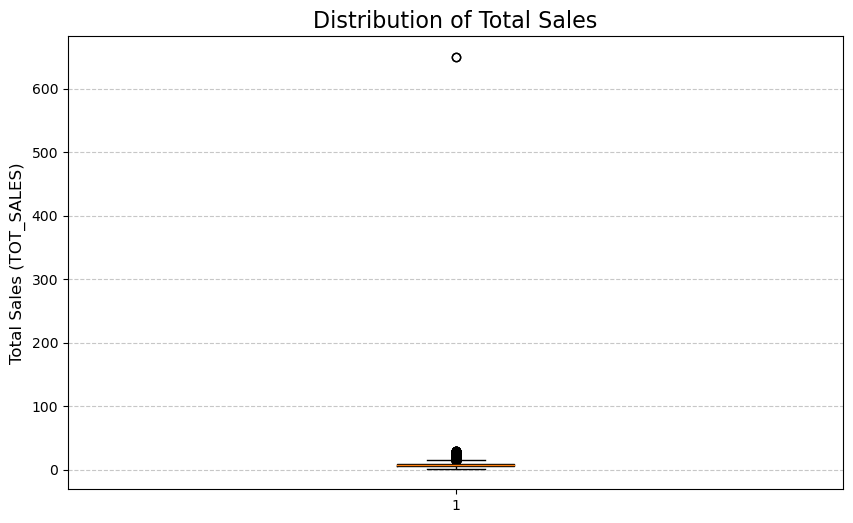

In [37]:
plt.figure(figsize=(10, 6), dpi=100)

plt.boxplot(transaction_data['TOT_SALES'])

plt.title('Distribution of Total Sales', fontsize=16)
plt.ylabel('Total Sales (TOT_SALES)', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


#### Since there are only 2 mass orders which result in outliers we will keep them as they are important to our analysis

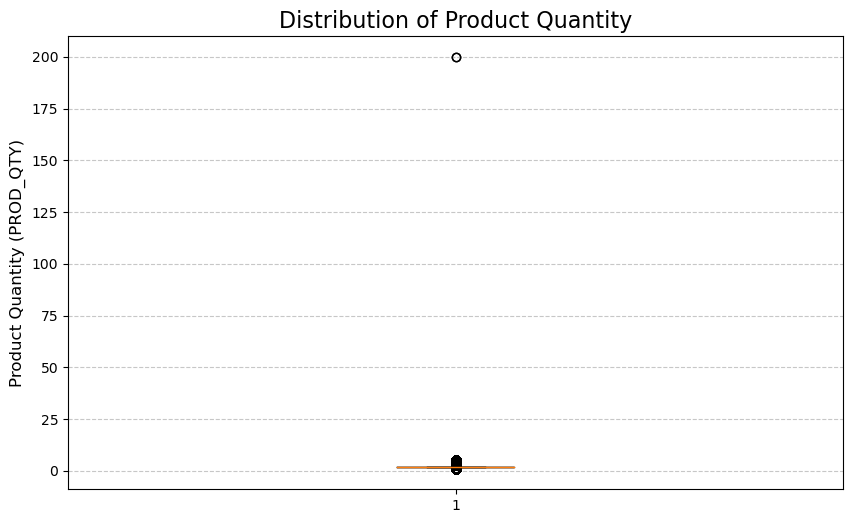

In [38]:
plt.figure(figsize=(10, 6), dpi=100)

plt.boxplot(transaction_data['PROD_QTY'])

plt.title('Distribution of Product Quantity', fontsize=16)
plt.ylabel('Product Quantity (PROD_QTY)', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [39]:
unique_quantities = transaction_data['PROD_QTY'].unique()

print(unique_quantities)

[  2   3   5   1   4 200]


#### Since there are only 2 mass orders which result in outliers we will keep them as they are important to our analysis

In [40]:
customer_data = pd.read_csv("C:/Users/agast/OneDrive/Documents/Power BI Project/QVI_purchase_behaviour.csv")

In [41]:
# Basic exploration
print(customer_data.head())
print(customer_data.info())
print(customer_data.describe())
print(customer_data.isnull().sum())  # Check for missing values

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
       LYLTY_CARD_NBR
count    7.263700e+04
mean     1.361859e+05
std      8.989293e+04
min      1.000000e+03
25%      6.620200e+04
50%      1.340400e+05
75%      2.033750e+05
max      2.373711e+06
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUS

In [42]:
customer_data.duplicated().sum() # Checking for duplicated

0

In [43]:
#Checking for unique values in the 2 categorical variables

# Unique values in LIFESTAGE
unique_lifestages = customer_data['LIFESTAGE'].unique()
print("Unique LIFESTAGE values:", unique_lifestages)

# Unique values in PREMIUM_CUSTOMER
unique_premium_customers = customer_data['PREMIUM_CUSTOMER'].unique()
print("\nUnique PREMIUM_CUSTOMER values:", unique_premium_customers)

Unique LIFESTAGE values: ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']

Unique PREMIUM_CUSTOMER values: ['Premium' 'Mainstream' 'Budget']


In [44]:
# Standardize LIFESTAGE
customer_data['LIFESTAGE'] = customer_data['LIFESTAGE'].str.strip().str.lower()

# Standardize PREMIUM_CUSTOMER
customer_data['PREMIUM_CUSTOMER'] = customer_data['PREMIUM_CUSTOMER'].str.strip().str.lower()

In [45]:
#Merging the 2 datasets

# Merge the DataFrames using 'LYLTY_CARD_NBR' as the key
merged_data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR', how='left')

merged_data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,natural chip compny seasalt175g,2,6.0,young singles/couples,premium
1,2019-05-14,1,1307,348,66,ccs nacho cheese 175g,3,6.3,midage singles/couples,budget
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken 170g,2,2.9,midage singles/couples,budget
3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion 175g,5,15.0,midage singles/couples,budget
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili 150g,3,13.8,midage singles/couples,budget
5,2019-05-19,4,4074,2982,57,old el paso salsa dip tomato mild 300g,1,5.1,midage singles/couples,budget
6,2019-05-16,4,4149,3333,16,smiths crinkle chips salt & vinegar 330g,1,5.7,midage singles/couples,budget
7,2019-05-16,4,4196,3539,24,grain waves sweet chilli 210g,1,3.6,midage singles/couples,budget
8,2018-08-20,5,5026,4525,42,doritos corn chip mexican jalapeno 150g,1,3.9,midage singles/couples,budget
9,2018-08-18,7,7150,6900,52,grain waves sour cream&chives 210g,2,7.2,midage singles/couples,budget


In [46]:
#Rearranging
numerical_cols = ['PROD_QTY', 'TOT_SALES']

# Identify categorical columns to move
cols_to_move = ['LIFESTAGE', 'PREMIUM_CUSTOMER']

# Identify remaining columns
remaining_cols = [col for col in merged_data.columns if col not in numerical_cols and col not in cols_to_move]

# Create new column order
new_cols = remaining_cols + cols_to_move + numerical_cols

# Rearrange the DataFrame
merged_data = merged_data[new_cols]

# Display the rearranged DataFrame
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,natural chip compny seasalt175g,young singles/couples,premium,2,6.0
1,2019-05-14,1,1307,348,66,ccs nacho cheese 175g,midage singles/couples,budget,3,6.3
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken 170g,midage singles/couples,budget,2,2.9
3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion 175g,midage singles/couples,budget,5,15.0
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili 150g,midage singles/couples,budget,3,13.8


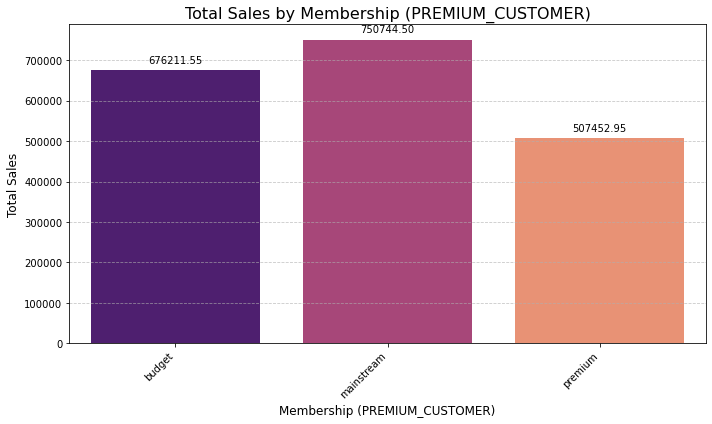

In [65]:
# Average total sales by membership

# 1. Calculate Total Sales by PREMIUM_CUSTOMER
total_sales_by_membership = merged_data.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index()


# 3. Create the Bar Chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='PREMIUM_CUSTOMER', y='TOT_SALES', data=total_sales_by_membership, palette='magma')  # Change palette if desired

plt.title('Total Sales by Membership (PREMIUM_CUSTOMER)', fontsize=16)
plt.xlabel('Membership (PREMIUM_CUSTOMER)', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)


# 5. Add Values on Top of Bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

#### Premium customers are surprisingly performing very bad as compared to other members. These members should be targeted to boost the sales

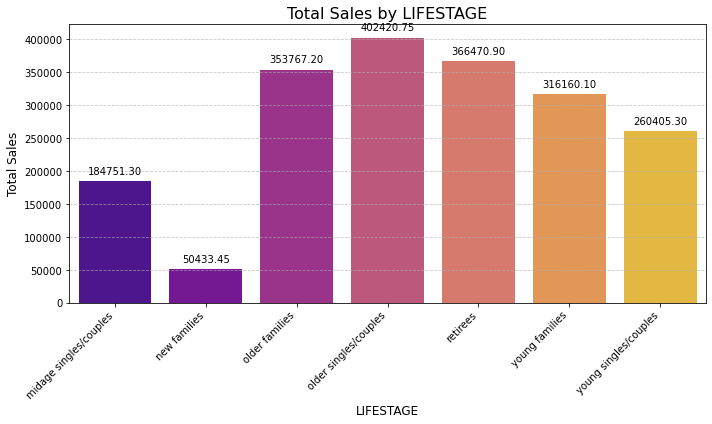

In [64]:
# 1. Calculate Total Sales by LIFESTAGE
total_sales_by_lifestage = merged_data.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()

# 3. Create the Bar Chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='LIFESTAGE', y='TOT_SALES', data=total_sales_by_lifestage, palette='plasma')

plt.title('Total Sales by LIFESTAGE', fontsize=16)
plt.xlabel('LIFESTAGE', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Add Values on Top of Bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

#### Potato chips are performing extremely well among old peope as compared to younger people. Younger demograph should be targeted to increase the sales

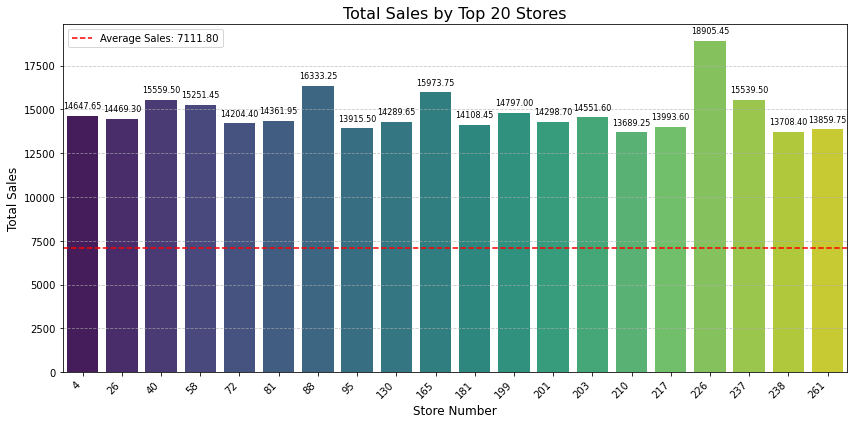

In [60]:


# 1. Calculate Total Sales by Store Number and Sort
total_sales_by_store = merged_data.groupby('STORE_NBR')['TOT_SALES'].sum().reset_index()
total_sales_by_store = total_sales_by_store.sort_values(by='TOT_SALES', ascending=False)

# 2. Display Top N Stores
top_n = 20
top_stores = total_sales_by_store.head(top_n)

# 3. Calculate Average Total Sales
average_total_sales = total_sales_by_store['TOT_SALES'].mean()

# 4. Create the Bar Chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='STORE_NBR', y='TOT_SALES', data=top_stores, palette='viridis')
plt.title(f'Total Sales by Top {top_n} Stores', fontsize=16)
plt.xlabel('Store Number', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Add Average Sales Line
plt.axhline(y=average_total_sales, color='red', linestyle='--', label=f'Average Sales: {average_total_sales:.2f}')
plt.legend()  # Show legend for the average line

# 6. Add Values on Top of Bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

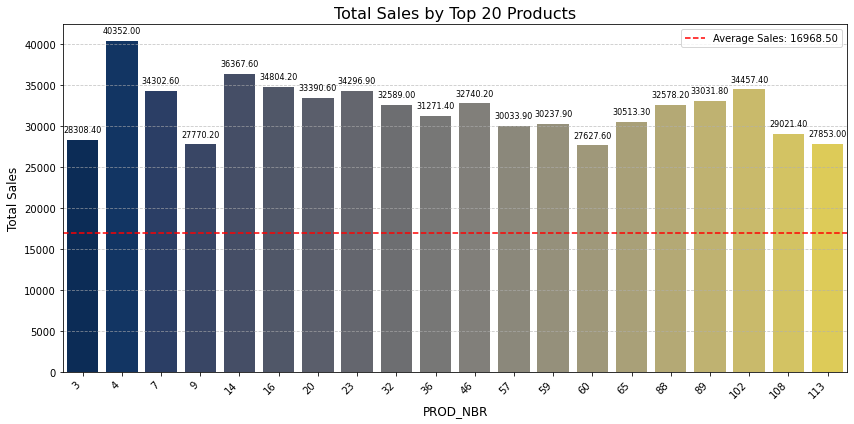

In [67]:



# 1. Calculate Total Sales by PROD_NBR and Sort
total_sales_by_prod = merged_data.groupby('PROD_NBR')['TOT_SALES'].sum().reset_index()
total_sales_by_prod = total_sales_by_prod.sort_values(by='TOT_SALES', ascending=False)

# 2. Display Top N PROD_NBRs
top_n = 20
top_prods = total_sales_by_prod.head(top_n)

# 3. Calculate Average Total Sales
average_total_sales = total_sales_by_prod['TOT_SALES'].mean()

# 4. Create the Bar Chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='PROD_NBR', y='TOT_SALES', data=top_prods, palette='cividis')  # Change palette if desired
plt.title(f'Total Sales by Top {top_n} Products', fontsize=16)
plt.xlabel('PROD_NBR', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 5. Add Average Sales Line
plt.axhline(y=average_total_sales, color='red', linestyle='--', label=f'Average Sales: {average_total_sales:.2f}')
plt.legend()

# 6. Add Values on Top of Bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()